In [11]:
from typing import List
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from Bio import SeqIO
from Bio.Seq import Seq
import os
import gzip

# Read and convert gz file into dataframe 

In [45]:
# parse sequence fasta file
#converting lists to pandas Series    
#Gathering Series into a pandas DataFrame and rename index as ID column

ID_list = []
Seq_list = []
len_list = []
with gzip.open("smurfp_ngs_merge.fq.gz", "rt") as handle:
    for record in SeqIO.parse(handle, 'fastq'):
        ID_list.append(record.id)
        Seq_list.append(str(record.seq))
        len_list.append(len(record.seq))
        

In [46]:
Qfasta = pd.DataFrame(dict(ID=ID_list, length=len_list, seq = Seq_list))

In [47]:
Qfasta.head()

,ID,length,seq
0,A01940:366:GW240324000:1:2101:29044:1157,441,GGCGCGGTGTTAAATATGAAAACTTCTGAACAACGTGTAAACATCG...
1,A01940:366:GW240324000:1:2101:29288:1172,441,GGCGCGGTGGTAAATATGAAAACTTCTGAACAACGTGTAAACATCG...
2,A01940:366:GW240324000:1:2101:13494:1188,443,GGCGCGGTGTTAAATATGAAAACTTCTGAACAACGTGTAAACATCG...
3,A01940:366:GW240324000:1:2101:15953:1251,445,GGCGCGGTGTTAAATATGAAAACTTCTGAACAACGTGTAAACATCG...
4,A01940:366:GW240324000:1:2101:29984:1282,442,GGCGCGGTGTTAAATATGAAAACTTCAGAACAACGTGTAAACATCG...


In [48]:
# total reads 
total_reads = len(Qfasta)
total_reads

190142

# Filter valid seq

## Filtering based on barcode

In [73]:
filtered_smurfp = pd.read_csv('vfind-py-main/filtered_smurfp.csv',index_col=0)
filtered_smurfp.head()

,Proseq,count
0,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,16
1,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLSAPGGIAFSQ...,1
2,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,1
3,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,1
4,MKTSEQRVNIATLLTENKKKIVDKASQDLWRHHPDLIAPGGIAFSQ...,13


In [75]:
# number of valid seq after filtering based on bc
sum(filtered_smurfp['count'])

167939

In [80]:
# drop seq has internal stop codon
filtered_smurfp_df2 = filtered_smurfp[~filtered_smurfp['Proseq'].str.contains('\*')]
sum(filtered_smurfp_df2['count'])

133589

In [81]:
filtered_smurfp_df2['Seqlen'] = filtered_smurfp_df2['Proseq'].apply(lambda x: len(x))

/var/folders/1_/d7mf3gn51j1b7n1wq2n5xzcm0000gn/T/ipykernel_50530/1493450539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_smurfp_df2['Seqlen'] = filtered_smurfp_df2['Proseq'].apply(lambda x: len(x))


In [82]:
filtered_smurfp_df2.head()

,Proseq,count,Seqlen
0,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,16,134
1,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLSAPGGIAFSQ...,1,134
3,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,1,135
4,MKTSEQRVNIATLLTENKKKIVDKASQDLWRHHPDLIAPGGIAFSQ...,13,134
6,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,21,135


In [83]:
pd.unique(filtered_smurfp_df2['Seqlen'])

array([134, 135, 136, 133, 111,  48, 108,  26, 132, 137, 126, 114, 113,
       128, 129, 124, 121, 125, 127,  75, 104, 105, 131, 120, 107,  82,
        61, 130,  50,  49, 116, 106,  38,  54,  30,  90,  73,  56, 115,
       118, 119,  33,  41,  53,  36,  74,  57, 122, 117,  81, 112,  47,
        52,  59,  63,  27,  29, 123,  58, 110,  96,  43,  31, 103,  37,
       138, 109, 102,  40,  94,  71,  84,  83,  28,  46,  97,  34,  60,
        66,  45,  87,  62,  78,  44,  64,  42, 101,  32,  77,  86,  69,
        72, 140,  65,  80,  39,  76,  55,  35,  67,  85, 139,  51, 100])

In [92]:
# plot the distribution of variants based on the seq length
filtered_smurfp_df2_len = filtered_smurfp_df2.groupby('Seqlen')['count'].agg(np.sum).reset_index()
filtered_smurfp_df2_len.head()

,Seqlen,count
0,26,24
1,27,8
2,28,13
3,29,5
4,30,7


In [95]:
length_values = filtered_smurfp_df2_len['Seqlen'].tolist()
count_values = filtered_smurfp_df2_len['count'].tolist()

# Repeat each length value based on its count
length_frequency = [length for length, count in zip(length_values, count_values) for _ in range(count)]

#print(length_frequency)

Text(0.5, 1.0, 'Distribution of variants by length')

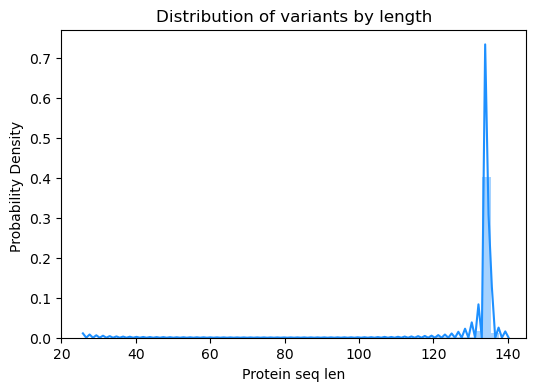

In [100]:
# plot the distribution of variants reads v.s. length
fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True, dpi=100)
sns.distplot(length_frequency , color="dodgerblue")
plt.xlim(20,145)
plt.xlabel('Protein seq len')
plt.ylabel('Probability Density ')
plt.title('Distribution of variants by length')

In [114]:
# check the top 5 most abundant length according to DMS design
Counter(length_frequency).most_common(5)

[(134, 73811), (135, 48205), (133, 4724), (136, 3432), (132, 301)]

In [101]:
# wild type protein seq of smurfp
wtsmurfp_seq = 'MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQRDRALCLRDYGWFLHLITFCLLAGDKGPIESIGLISIREMYNSLGVPVPAMMESIRCLKEASLSLLDEEDANETAPYFDYIIKAMSEF'
len(wtsmurfp_seq)

134

## filtering based on length

In [119]:
# wt smurfp is 134 aa starting from M to the end of histag. 
# For deletion: seq len should be 133
# insertion seq len should be 135
# rep seq len should be 134
# somehow len 136 is also abundant (2 insertion?), keep it just in case which can be added into insertion dms heatmap later. drop the other len
# Assuming 'filtered_smurfp_df2' is your DataFrame
filtered_smurfp_final = filtered_smurfp_df2.drop(filtered_smurfp_df2[(filtered_smurfp_df2['Seqlen'] > 136) | (filtered_smurfp_df2['Seqlen'] < 133)].index)

# Verify the result
pd.unique(filtered_smurfp_final['Seqlen'])

filtered_smurfp_final.to_csv('final_filtered_smurfp.csv')


In [117]:
filtered_smurfp_df2[filtered_smurfp_df2['Proseq'] == wtsmurfp_seq]

,Proseq,count,Seqlen
26,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,19663,134


In [118]:
finalvalid_count = sum(filtered_smurfp_final['count'])
# how much wt in the lib
wt_ratio =19663/finalvalid_count
wt_ratio

0.15105399010539902

In [127]:
finalvalid_count

130172

# Make heatmap of each mut lib
##### To profile mutation for each lib, theseq will be grouped by length corresponding to 1 aa replacement, substution, insertion.

In [131]:

# dms_aa: Define all possible amino acids (adjust as needed)
# pass all possible amino acid designed in dms library and the dataframe generated above which represents counts of each unique variant seqinto the following function. Note: df has to be grouped by len for analysis.

def _dms_heatmap_df(df, dms_aa):

    # Initialize a dictionary to hold the frequency data
    frequency_matrix = {aa: [0]*len(df['Proseq'].iloc[0]) for aa in dms_aa}
    # Calculate the frequency of each amino acid at each position
    for index, row in df.iterrows():
        sequence = row['Proseq']
        read_count = row['count']
        for position, amino_acid in enumerate(sequence):
            if amino_acid in frequency_matrix:
                frequency_matrix[amino_acid][position] += read_count

    # Convert the frequency matrix to a DataFrame for easier plotting
    frequency_df = pd.DataFrame(frequency_matrix)

    # Normalize the frequencies by the total read counts to get relative frequencies
    frequency_df = frequency_df.div(frequency_df.sum(axis=1), axis=0)
    transposed_df = frequency_df.transpose()
    return transposed_df


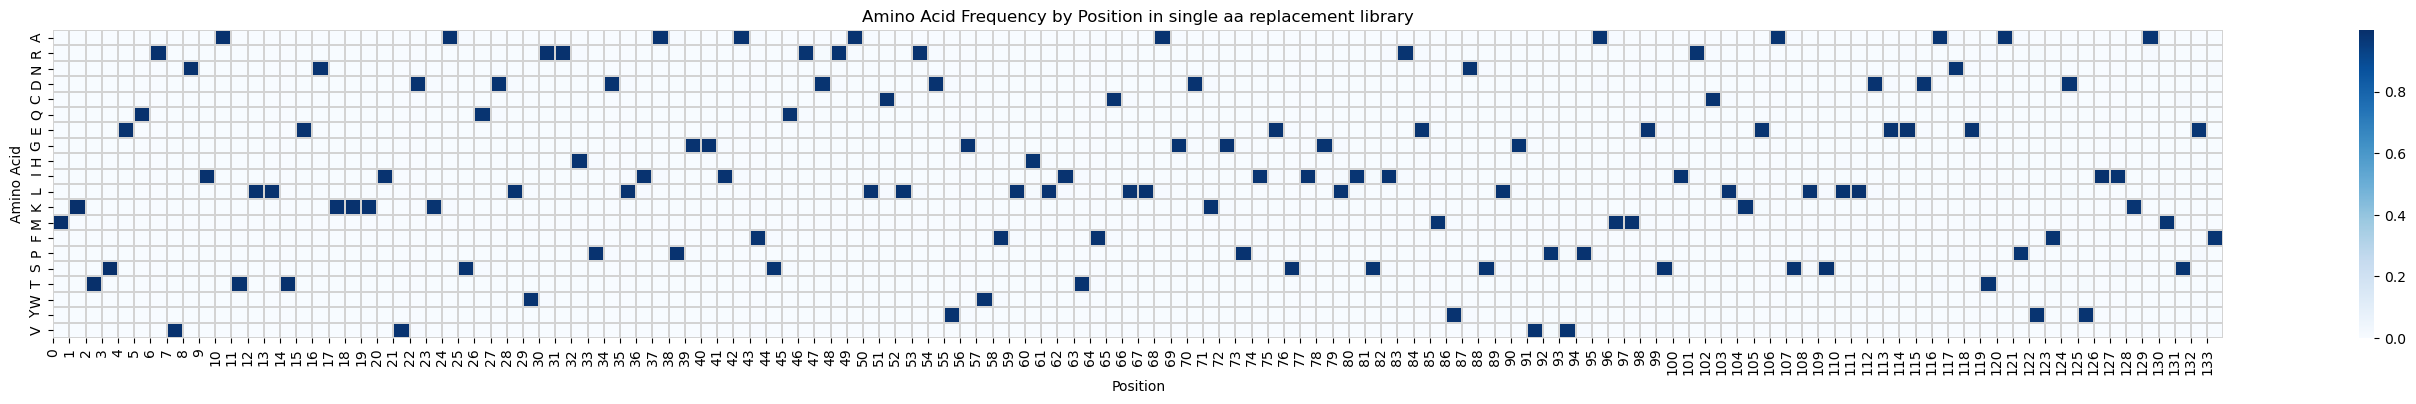

In [142]:
# test plot repl library, len = 134
df_repl = filtered_smurfp_final[filtered_smurfp_final['Seqlen'] == 134]
amino_acids = 'ARNDCQEGHILKMFPSTWYV'

# Plotting the heatmap
plt.figure(figsize=(35, 4))
sns.heatmap(_dms_heatmap_df(df_repl, amino_acids ), cmap='Blues', annot=False,linewidths=0.1, linecolor='lightgray')
plt.title('Amino Acid Frequency by Position in single aa replacement library')
plt.xlabel('Position')
plt.ylabel('Amino Acid')
plt.xticks(range(0, 134, 1),labels=range(0, 134, 1))
plt.show()


In [165]:
# drop the wild type aa in each position in the library to better visialize the distribution of acutal mutation
# Loop through the list and populate the dictionary
def _drop_wtaa_df(dms_df, wtseq):
    df = dms_df.transpose()
    df_drop_wtaa = df.copy()
    for wt_position, wt_amino_acid in enumerate(wtseq):
        #print(wt_position , wt_amino_acid)
        #print(df_drop_wtaa.loc[wt_position, wt_amino_acid])
        df_drop_wtaa.loc[wt_position, wt_amino_acid] = 0 
        transpose_df_drop_wtaa = df_drop_wtaa.transpose()
    return transpose_df_drop_wtaa



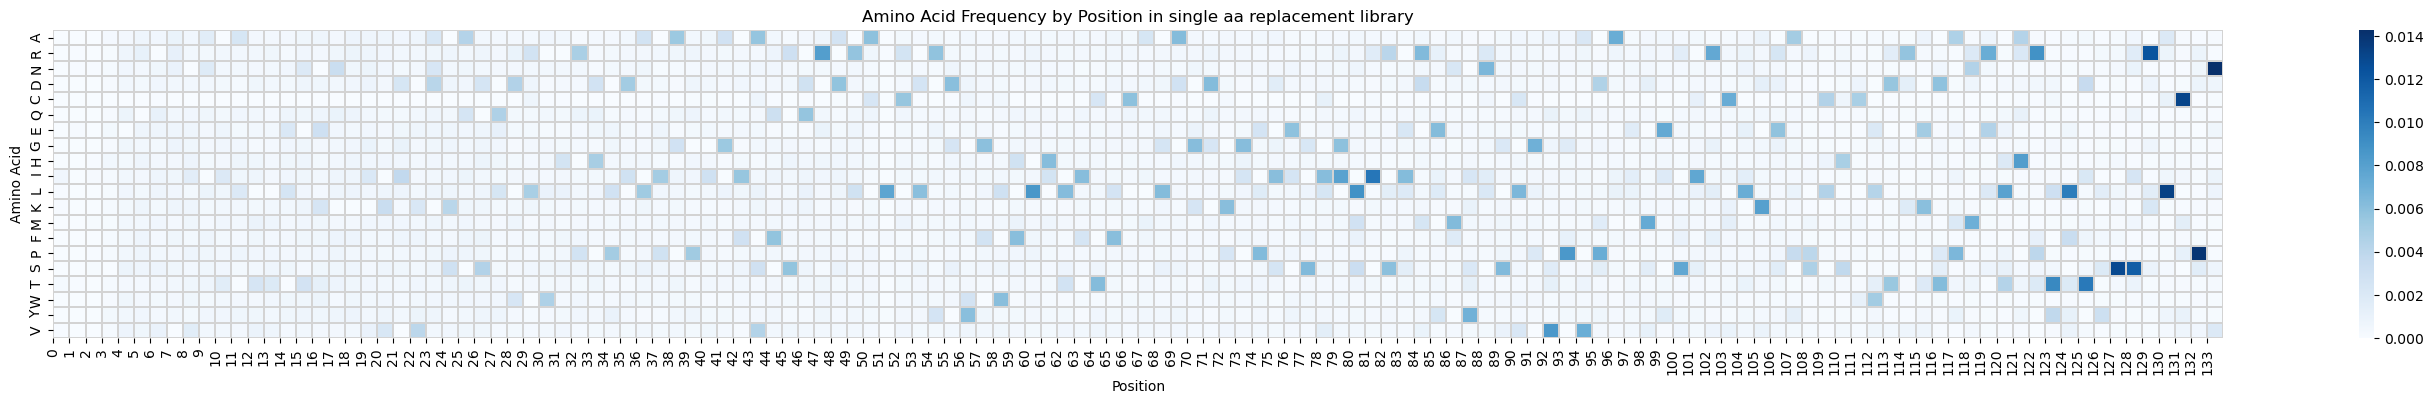

In [168]:
# Plotting the heatmap, after drop the wt aa for each position
plt.figure(figsize=(35, 4))
sns.heatmap( _drop_wtaa_df(_dms_heatmap_df(df_repl, amino_acids ), wtsmurfp_seq), cmap='Blues', annot=False,linewidths=0.1, linecolor='lightgray')
plt.title('Amino Acid Frequency by Position in single aa replacement library')
plt.xlabel('Position')
plt.ylabel('Amino Acid')
plt.xticks(range(0, 134, 1),labels=range(0, 134, 1))
plt.show()

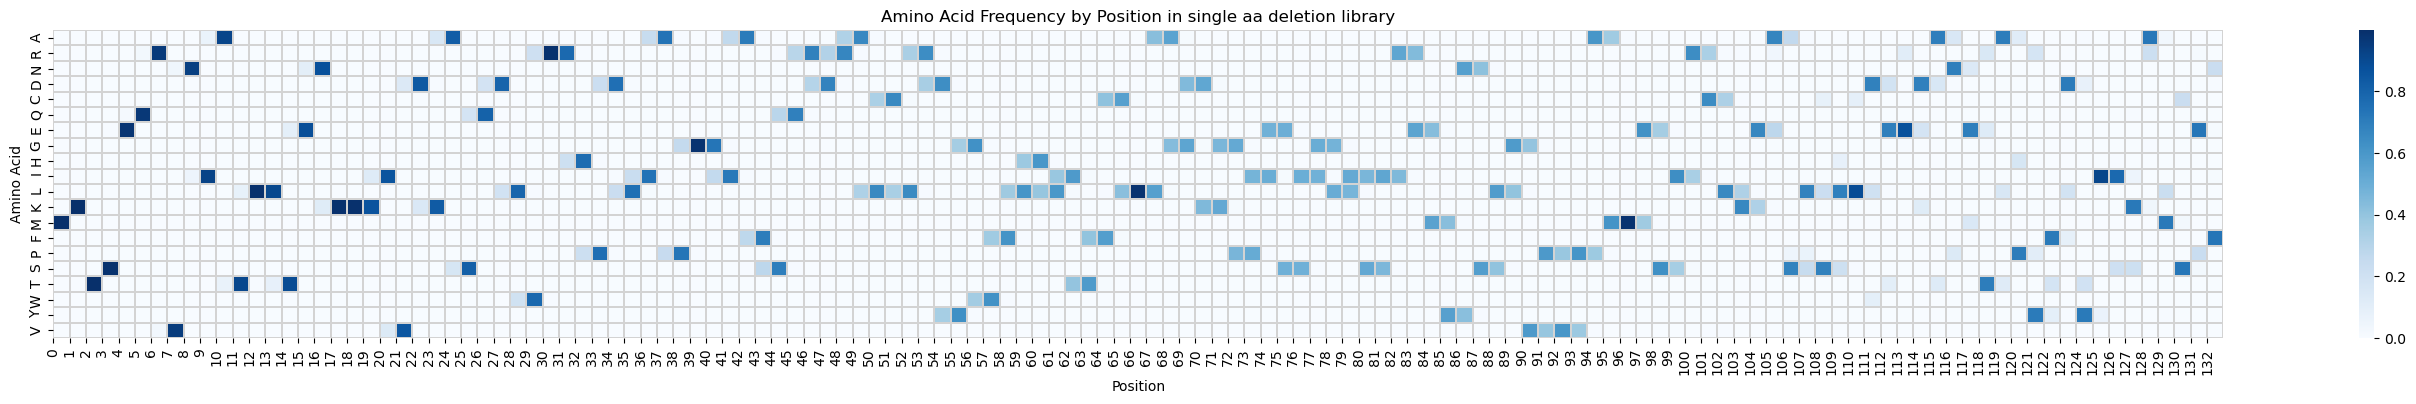

In [175]:
# plot single aa deletion library, len = 133
df_del = filtered_smurfp_final[filtered_smurfp_final['Seqlen'] == 133]
amino_acids = 'ARNDCQEGHILKMFPSTWYV'

# Plotting the heatmap
plt.figure(figsize=(35, 4))
sns.heatmap(_dms_heatmap_df(df_del, amino_acids ), cmap='Blues', annot=False,linewidths=0.1, linecolor='lightgray')
plt.title('Amino Acid Frequency by Position in single aa deletion library')
plt.xlabel('Position')
plt.ylabel('Amino Acid')
plt.xticks(range(0, 133, 1),labels=range(0, 133, 1))
plt.show()

## plot deletion by itself.(star sign)

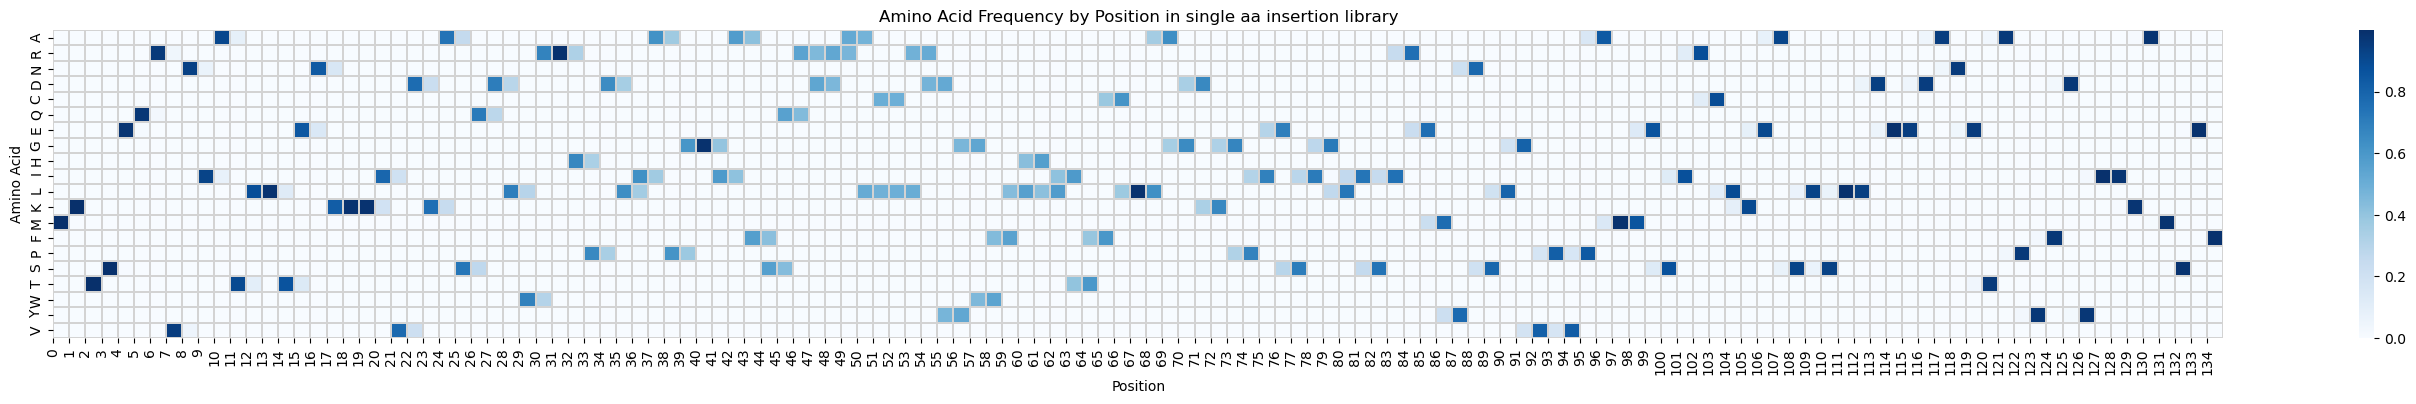

In [176]:
# plot single aa insertion library, len = 133
df_ins1 = filtered_smurfp_final[filtered_smurfp_final['Seqlen'] == 135]
amino_acids = 'ARNDCQEGHILKMFPSTWYV'

# Plotting the heatmap
plt.figure(figsize=(35, 4))
sns.heatmap(_dms_heatmap_df(df_ins1, amino_acids ), cmap='Blues', annot=False,linewidths=0.1, linecolor='lightgray')
plt.title('Amino Acid Frequency by Position in single aa insertion library')
plt.xlabel('Position')
plt.ylabel('Amino Acid')
plt.xticks(range(0, 135, 1),labels=range(0, 135, 1))
plt.show()


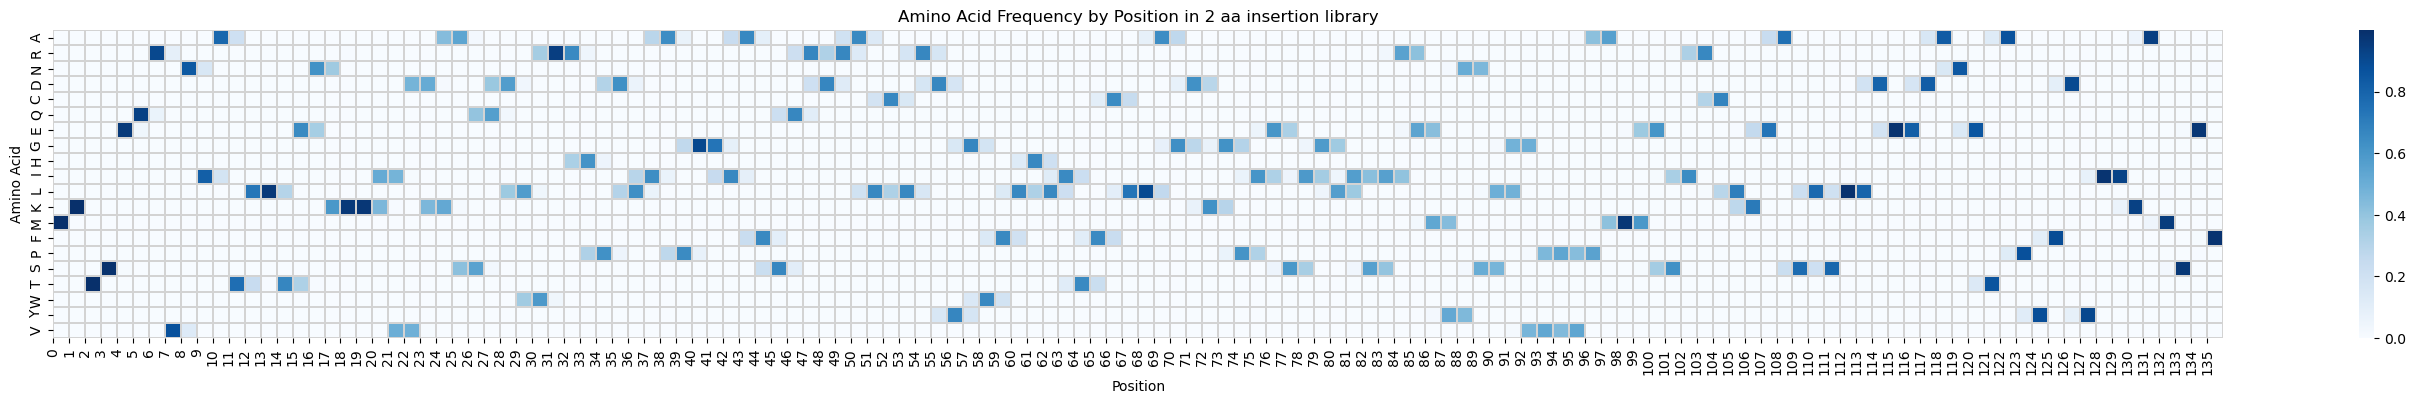

In [178]:
# plot 2 aa insertion library, len = 133
df_ins2 = filtered_smurfp_final[filtered_smurfp_final['Seqlen'] == 136]
amino_acids = 'ARNDCQEGHILKMFPSTWYV'

# Plotting the heatmap
plt.figure(figsize=(35, 4))
sns.heatmap(_dms_heatmap_df(df_ins2, amino_acids ), cmap='Blues', annot=False,linewidths=0.1, linecolor='lightgray')
plt.title('Amino Acid Frequency by Position in 2 aa insertion library')
plt.xlabel('Position')
plt.ylabel('Amino Acid')
plt.xticks(range(0, 136, 1),labels=range(0, 136, 1))
plt.show()


## Calculate the actual coverage

In [ ]:
# calculate the coverage of the replacement library
# Total count of oligos for single aa replacement:2527
# Total count of oligos for single aa deletion:133
# Total count of oligos for single aa insertion:2680 

In [ ]:
# generate the DMS protein sequence for each library

In [ ]:

''''ofile = open("test_fasta.txt", "w")
i = 0
for i in range(len(Geneaa_list)):
    ofile.write(">" + ID_list[i] + "\n" + Geneaa_list[i] + "\n")

#do not forget to close it
ofile.close() '''

In [ ]:
#record = list(SeqIO.parse("test_fasta.fasta", "fasta"))


In [ ]:
#type(record)

In [ ]:
''''from Bio.Align import MultipleSeqAlignment

align = MultipleSeqAlignment(record)'''